# MAP 433
## Groupe 2
### DM 2

COSTA, Caio; SILVA CLAUDINO, Ariel; ZUIN RUIZ, Luis Henrique

### Partie Théorique

### Question 1. Montrer que le modèle est identifiable

Si $\mathbb{P}_\theta = \mathbb{P}_{\theta'}$,

alors pour tout $1 \le i \le n$, on a $\mathrm{Ber}(\varphi(\theta^T \mathbf{x}_i)) = \mathrm{Ber}(\varphi(\theta'^T \mathbf{x}_i))$,

et donc pour tout $1 \le i \le n$, $\varphi(\theta^T \mathbf{x}_i) = \varphi(\theta'^T \mathbf{x}_i)$.

Ainsi, vu que la fonction sigmoide $\varphi$ est bijective, on a $\theta^T \mathbf{x}_i = \theta'^T \mathbf{x}_i$ pour tout $1 \le i \le n$.

Donc, $X_n \theta = X_n \theta'$, et comme $X_n$ est de rang plein, on a $\theta = \theta'$.

### Question 2. Monter que $F_n(\theta)$ est définie positive

Soit $w \in \mathbb{R}^p$. On veut montrer que $w^T F_n(\theta) w \ge 0$ et que $w^T F_n(\theta) w = 0$ si et seulement si $w = 0$.

$$\begin{align*}
w^T F_n(\theta) w &= \sum_{i=1}^n h(\theta^T \mathbf{x}_i) w^T \mathbf{x}_i \mathbf{x}_i^T w \\
&= \sum_{i=1}^n h(\theta^T \mathbf{x}_i) (w^T \mathbf{x}_i)^2 \\
&\ge 0,
\end{align*}$$

car $h \colon \mathbb{R} \to [0, 1]$ est positive. De plus, $h$ ne s'annule pas sur $\mathbb{R}$, donc $w^T F_n(\theta) w = 0$ si et seulement si $w^T \mathbf{x}_i = 0$ pour tout $1 \le i \le n$, c'est-à-dire si et seulement si $X_n^T w = 0$. Comme $X_n$ est de rang plein, on a $w = 0$.

### Question 3. Montrer que $h$ est 1-Lipschitzienne sur $\mathbb{R}$

On va estimer la dérivée de $h$.

$$\begin{align*}
h(t) &= \frac{e^t}{(1 + e^t)^2} \\
\implies h'(t) &= \frac{e^t (1-e^t)}{(1 + e^t)^3}
\end{align*}$$

Pour $t \in \mathbb{R}$, $e^t \in (0, \infty)$, donc il nous faut analyser le comportement de $f(y) = \frac{y(1-y)}{(1+y)^3}$ sur $(0, \infty)$.

$$\begin{align*}
f'(y) &= \frac{y^2 - 4y + 1}{(y+1)^4} = 0 \iff y = 2 \pm \sqrt{3} \\
\end{align*}$$

La valeur maximale de |f(y)| est 0.09622145382044442


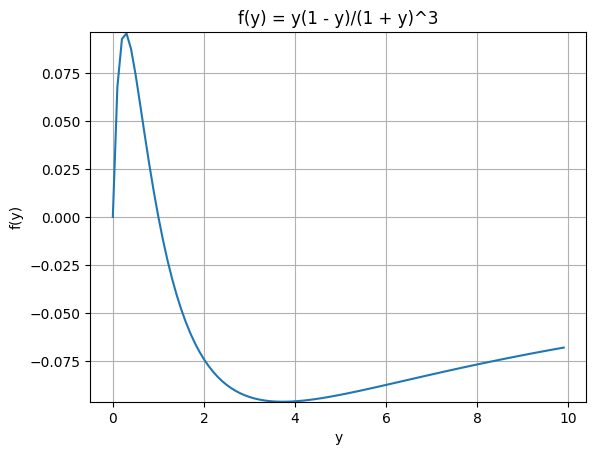

In [3]:
import numpy as np
import matplotlib.pyplot as plt

y = np.arange(0, 10, 0.1)
f = y * (1 - y) / (1 + y) ** 3

plt.plot(y, f)
plt.xlabel('y')
plt.ylabel('f(y)')
plt.title('f(y) = y(1 - y)/(1 + y)^3')

max_abs_f = np.max(np.abs(f))
plt.ylim(-max_abs_f, max_abs_f)
plt.grid()

print('La valeur maximale de |f(y)| est', max_abs_f)
plt.show()

Donc, comme $\sup_{y \in (0, \infty)} |f(y)| \approx 0.096221 \le 1$, on a $|h'(t)| \le 1$ pour tout $t \in \mathbb{R}$, et donc $h$ est 1-Lipschitzienne sur $\mathbb{R}$.

### Question 4. Déterminer la vraisemblance et la log-vraisemblance du modèle

La vraisemblance du modèle est donnée par

$$\begin{align*}
L_n(\theta) &= \prod_{i=1}^n \mathbb{P}_\theta(Y_i = y_i) \\
&= \prod_{i=1}^n \varphi(\theta^T \mathbf{x}_i)^{y_i} (1 - \varphi(\theta^T \mathbf{x}_i))^{1-y_i} \\
\end{align*}$$

Donc la log-vraisemblance est donnée par
$$\begin{align*}
\ell_n(\theta) &= \log L_n(\theta) \\
&= \sum_{i=1}^n y_i \log \varphi(\theta^T \mathbf{x}_i) + (1-y_i) \log (1 - \varphi(\theta^T \mathbf{x}_i)) \\
\end{align*}$$

### Question 5. Montrer que la log-vraisemblance est strictement concave

On a
$$\nabla_\theta ~ \varphi(\theta^T x_i) = \varphi'(\theta^T x_i) ~ x_i,$$

donc, comme $\varphi' = \varphi(1 - \varphi) = h$, on a
$$\begin{align*}
\nabla_\theta ~ \ell_n(\theta) &= \sum_{i=1}^n \left( y_i \frac{\varphi'(\theta^T x_i)}{\varphi(\theta^T x_i)} - (1-y_i) \frac{\varphi'(\theta^T x_i)}{1 - \varphi(\theta^T x_i)} \right) x_i \\
&= \sum_{i=1}^n \left( \frac{y_i (1 - \varphi(\theta^T x_i)) - (1-y_i) \varphi(\theta^T x_i)}{h(\theta^T x_i)} \right) \varphi'(\theta^T x_i) x_i \\
&= \sum_{i=1}^n \left( \frac{y_i - \varphi(\theta^T x_i)}{h(\theta^T x_i)} \right) \varphi'(\theta^T x_i) x_i \\
&= \sum_{i=1}^n \left( y_i - \varphi(\theta^T x_i) \right) x_i \\
&= X_n^T (Y_n - \Phi_n (\theta)),
\end{align*}$$

Pour calculer la hessienne, on pose $\nabla_\theta ~ \ell_n(\theta) = (f_1, \ldots, f_p)^T$. La hessienne est donnée par $\nabla^2_\theta ~ \ell_n(\theta) = \left( \frac{\partial f_i}{\partial \theta_j} \right)_{1 \le i, j \le p} = \left( (\nabla_\theta f_i)^T \right)_{1 \le i \le p}^T$.

$$\begin{align*}
f_i &= \sum_{j=1}^n (y_j - \varphi(\theta^T x_j)) x_{j, i} \\
\implies \nabla_\theta ~ f_i &= \sum_{j=1}^n \left( -\varphi'(\theta^T x_j) x_{j, i} \right) x_j \\
\implies \nabla_\theta ~ f_i^T &= \sum_{j=1}^n \left( -\varphi'(\theta^T x_j) x_{j, i} \right) x_j^T \\
\implies \nabla^2_\theta ~ \ell_n(\theta) &= - \sum_{j=1}^n \varphi'(\theta^T x_j) x_j x_j^T \\
&= - \sum_{j=1}^n h(\theta^T x_j) x_j x_j^T \\
&= - F_n(\theta),
\end{align*}$$

On calcule maintenant $\mathbb{E}_{n, \theta} \left[ \nabla_\theta \ell_n(\theta) ~ \nabla_\theta \ell_n(\theta)^T \right]$.

$$\nabla_\theta \ell_n(\theta) ~ \nabla_\theta \ell_n(\theta)^T = X_n^T (Y_n - \Phi_n(\theta)) (Y_n - \Phi_n(\theta))^T X_n$$

$$\mathbb{E}_{n, \theta} (Y_n) = \Phi_n(\theta)$$

$$\begin{align*}
(\mathbb{E}_{n, \theta} (Y_n Y_n^T))_{ij} &= \mathbb{E}_{n, \theta} (Y_i ~ Y_j) \\
&= \mathbb{E}_{n, \theta} (Y_i) \mathbb{E}_{n, \theta} (Y_j) (1 - \delta_{ij}) + \mathbb{E}_{n, \theta} (Y_i^2) \delta_{ij} \\
&= \mathbb{E}_{n, \theta} (Y_i) \mathbb{E}_{n, \theta} (Y_j) (1 - \delta_{ij}) + \mathbb{E}_{n, \theta} (Y_i) \delta_{ij} \\
&= \varphi(\theta^T x_i) \varphi(\theta^T x_j) (1 - \delta_{ij}) + \varphi(\theta^T x_i) \delta_{ij} \\
&= \varphi(\theta^T x_i) \varphi(\theta^T x_j) + \delta_{ij} \varphi(\theta^T x_i) (1 - \varphi(\theta^T x_i)) \\
&= \varphi(\theta^T x_i) \varphi(\theta^T x_j) + \delta_{ij} h(\theta^T x_i) \\
\implies \mathbb{E}_{n, \theta} (Y_n Y_n^T) &= \Phi_n(\theta) \Phi_n(\theta)^T + \mathrm{diag}(h(\theta^T x_1), \ldots, h(\theta^T x_n)) \\
\end{align*}$$

$$\begin{align*}
\mathbb{E}_{n, \theta} \left[ (Y_n - \Phi_n(\theta)) (Y_n - \Phi_n(\theta))^T \right] &= \mathbb{E}_{n, \theta} (Y_n Y_n^T) - \mathbb{E}_{n, \theta} (Y_n) \Phi_n(\theta)^T - \Phi_n(\theta) \mathbb{E}_{n, \theta} (Y_n)^T + \Phi_n(\theta) \Phi_n(\theta)^T \\
&= \mathbb{E}_{n, \theta} (Y_n Y_n^T) - \Phi_n(\theta) \Phi_n(\theta)^T \\
&= \mathrm{diag}(h(\theta^T x_1), \ldots, h(\theta^T x_n)) \\
&= \colon H_n(\theta),
\end{align*}$$

Donc,
$$\begin{align*}
\mathbb{E}_{n, \theta} \left[ \nabla_\theta \ell_n(\theta) ~ \nabla_\theta \ell_n(\theta)^T \right] &= X_n^T H_n(\theta) X_n \\
&= (x_1, \ldots, x_n) H_n(\theta) (x_1, \ldots, x_n)^T \\
&= \sum_{i=1}^n h(\theta^T x_i) x_i x_i^T \\
&= F_n(\theta),
\end{align*}$$

Comme la hessienne est négative définie, la log-vraisemblance est strictement concave.

$$\varphi(\lambda \theta_\star) = \frac 1 {1 + e^{-\lambda \theta_\star^T x_i}}$$

Si $y_i = 1$, on a $\theta_\star^T x_i > 0$, et alors $\lim_{\lambda \to \infty} \varphi(\lambda \theta_\star) = 1$.

Si $y_i = 0$, on a $\theta_\star^T x_i < 0$, et alors $\lim_{\lambda \to \infty} \varphi(\lambda \theta_\star) = 0$.

Dans les deux cas, on a
$$\lim_{\lambda \to \infty} y_i \log \varphi(\lambda \theta_\star^T x_i) + (1-y_i) \log (1 - \varphi(\lambda \theta_\star^T x_i)) = 0,$$

et en sommant sur $i$, on obtient $\lim_{\lambda \to \infty} \ell_n(\lambda \theta_\star) = 0$.

D'une part, comme $\ell_n(\theta) \le 0$ pour tout $\theta$, on a $\sup_{\theta} \ell_n(\theta) = 0$.
D'autre part, si on avait un maximum de vraisemblance $\hat{\theta}$, on aurait $\ell_n(\hat{\theta}) = \sup_{\theta} \ell_n(\theta) = 0$, mais ça ne peut pas arriver, car $\varphi(\theta^T x_i) \in (0,1) \implies \log \varphi(\theta^T x_i) \in (-\infty, 0)$ et $\log (1 - \varphi(\theta^T x_i)) \in (-\infty, 0)$, donc $\ell_n(\theta) < 0$ pour tout $\theta$.

### Question 7. Montrer que si les données sont quasi-séparables, alors le maximum de vraisemblance n'existe pas non plus

Soient $\mathcal E_0 = \{k \in \{1, \ldots, n\} \mid y_k = 0\}$ et $\mathcal E_1 = \{k \in \{1, \ldots, n\} \mid y_k = 1\}$.

On a

$$\begin{align*}
L_n(\theta_\lambda) &= \prod_{k \in \mathcal E_0} (1 - \varphi(\theta_\lambda^T x_k)) \\
&\times \prod_{k \in \mathcal E_1} \varphi(\theta_\lambda^T x_k) \\
&\times \prod_{k \in \mathcal E} \varphi(\theta_\lambda^T x_k)^{y_k} (1 - \varphi(\theta_\lambda^T x_k))^{1-y_k} \\
\end{align*}$$

Pour $k \in \mathcal E$,

$$\varphi(\theta_\lambda^T x_k)^{y_k} (1 - \varphi(\theta_\lambda^T x_k))^{1-y_k}$$

ne dépend pas de $\lambda$, car

$$\varphi(\theta_\lambda^T x_k) = \varphi(\lambda \theta_\star^T x_k + (\bar \theta - \theta_\star)^T x_k)
= \varphi((\bar \theta - \theta_\star)^T x_k).$$

Donc, on peut ignorer ces termes.

Pour $k \in \mathcal E_1$, on a $\theta_\star^T x_k > 0$.
Dans ce cas,
$\varphi$ étant strictement croissante, on a $\lambda \mapsto \varphi(\theta_\lambda^T x_k) = \varphi(\lambda \theta_\star^T x_k + (\bar \theta - \theta_\star)^T x_k)$ strictement croissante.

De même, pour $k \in \mathcal E_0$, on a $\theta_\star^T x_k < 0$ et $\lambda \mapsto \varphi(\theta_\lambda^T x_k)$ strictement décroissante, et alors $\lambda \mapsto 1 - \varphi(\theta_\lambda^T x_k)$ strictement croissante.

Cela démontre que $L_n(\theta_\lambda)$ est strictement croissante en $\lambda$, dès que $\mathcal E_0 \cup \mathcal E_1 \ne \emptyset$.

Comme $\bar \theta$ était arbitraire, on peut pour tout point $\theta = \bar \theta - \theta_\star \in \mathbb{R}^p$ trouver un $\theta_\lambda$ tel que $L_n(\theta_\lambda) > L_n(\theta)$, et donc le maximum de vraisemblance n'existe pas, dès que les données soient quasi-séparables et que $\mathcal E_0 \cup \mathcal E_1 \ne \emptyset$.

### Question 8. Montrer que l'existence d'un récouvrement implique l'existence et l'unicité du maximum de vraisemblance

Pour $\theta \in \mathbb{R}^p \setminus \{0\}$, $(\theta^T x_1, \ldots, \theta^T x_n)$ a toujours des éléments de signes opposés, donc 
$f(\theta) = \min\limits_{1 \le i \le n} \theta^T x_i < 0$ et $g(\theta) = \max\limits_{1 \le i \le n} \theta^T x_i > 0$. Comme $f$ est le $\min$ de fonctions continues et $g$ est le $\max$ de fonctions continues, $f$ et $g$ sont continues.

Sur le compact $\mathcal S(0,1)$, $f$ et $g$ atteignent leurs bornes, donc il existent $\theta_0, \theta_1 \in \mathcal S(0,1)$ tels que 

$$\begin{cases}
f(\theta) \le f(\theta_0) < 0 \\
g(\theta) \ge g(\theta_1) > 0
\end{cases}$$

pour tout $\theta \in \mathcal S(0,1)$. On prend $\zeta = \frac 1 2 \min\{|f(\theta_0)|, |g(\theta_1)|\}$, et on a $\zeta > 0$, avec

$$\begin{cases}
f(\theta) < -\zeta \\
g(\theta) > \zeta
\end{cases}$$

pour tout $\theta \in \mathcal S(0,1)$.



### Question 9. Montrer qu'il existe une constante $C$ telle que pour tout $\theta, \vartheta \in \mathbb{R}^p$, et tout $n > 0$, $F_n$ soit $Cn$-Lipschitzienne

On veut estimer

$$\lVert F_n(\theta) - F_n(\vartheta) \rVert = \sup\limits_{\lVert w \rVert = 1} \lVert \left[F_n(\theta) - F_n(\vartheta)\right] w \rVert.$$

Pour $w \in \mathbb{R}^p$ avec $\lVert w \rVert = 1$, on a

$$\begin{align*}
\lVert \left[F_n(\theta) - F_n(\vartheta)\right] w \rVert &= \left\lVert \sum_{i=1}^n [h(\theta^T x_i) - h(\vartheta^T x_i)] x_i x_i^T w \right\rVert \\
&\le \sum_{i=1}^n \left\lVert [h(\theta^T x_i) - h(\vartheta^T x_i)] x_i x_i^T w \right\rVert \\
&= \sum_{i=1}^n |x_i^T w| \cdot |h(\theta^T x_i) - h(\vartheta^T x_i)| \cdot \lVert x_i \rVert \\
&\le \sum_{i=1}^n \lVert x_i \rVert \cdot \lVert x_i \rVert \cdot \lVert w \rVert \cdot |h(\theta^T x_i) - h(\vartheta^T x_i)| &\quad \text{(Cauchy-Schwarz)} \\
&= \sum_{i=1}^n \lVert x_i \rVert^2 \cdot |h(\theta^T x_i) - h(\vartheta^T x_i)| &\quad \text{(car $\lVert w \rVert = 1$)} \\
&\le \sum_{i=1}^n \lVert x_i \rVert^2 \cdot | (\theta - \vartheta)^T x_i | &\quad \text{(car $h$ est 1-Lipschitzienne)} \\
&\le \lVert \theta - \vartheta \rVert \sum_{i=1}^n \lVert x_i \rVert^3 &\quad \text{(Cauchy-Schwarz)} \\
&= n \cdot \lVert \theta - \vartheta \rVert \cdot \frac 1 n \sum_{i=1}^n \lVert x_i \rVert^3 \\
&\le Cn \cdot \lVert \theta - \vartheta \rVert,
\end{align*}$$

où $C := \sup\limits_{n > 0} \frac 1 n \sum_{i=1}^n \lVert x_i \rVert^3 < \infty$ par hypothèse.

On a bien montré que, pour tout $w \in \mathbb{R}^p$ avec $\lVert w \rVert = 1$, $$\lVert \left[F_n(\theta) - F_n(\vartheta)\right] w \rVert \le Cn \lVert \theta - \vartheta \rVert.$$ En prenant le $\sup$ sur ces $w$, on obtient $\lVert F_n(\theta) - F_n(\vartheta) \rVert \le Cn \lVert \theta - \vartheta \rVert$, ce qui montre que $F_n$ est $Cn$-Lipschitzienne.

### Question 10

Comme $$\nabla \ell_n(\theta) = \sum_{i=1}^n \left\{y_i - \varphi(\theta^T x_i)\right\} x_i,$$ on a 
$$\nabla \ell_n(\hat \theta_{n}) - \nabla \ell_n(\theta) = - \sum_{i=1}^n \left\{ \varphi(\hat \theta_{n}^T x_i) - \varphi(\theta^T x_i) \right\} x_i.$$

On fait un développement limité d'ordre 1:

$$\varphi(t) = \varphi(t_0) + \varphi'(t_0) (t - t_0) + R(t) (t - t_0), \quad \text{avec} \quad \lim_{t \to t_0} R(t) = 0.$$

Donc, pour $t = \hat \theta_{n}^T x_i$ et $t_0 = \theta^T x_i$,

$$\begin{align*}
\varphi(\hat \theta_{n}^T x_i) - \varphi(\theta^T x_i) &= \varphi'(\theta^T x_i) (\hat \theta_{n}^T x_i - \theta^T x_i) + R(\hat \theta_{n}^T x_i) (\hat \theta_{n}^T x_i - \theta^T x_i) \\
&= \left[ \varphi'(\theta^T x_i) + R(\hat \theta_{n}^T x_i) \right] (\hat \theta_{n} - \theta)^T x_i \\
&= \left[ h(\theta^T x_i) + R(\hat \theta_{n}^T x_i) \right] x_i^T (\hat \theta_{n} - \theta).
\end{align*}$$

Donc, on a

$$\begin{align*}
\left\{\varphi(\hat \theta_{n}^T x_i) - \varphi(\theta^T x_i) \right\} x_i &= \left\{h(\theta^T x_i) + R(\hat \theta_{n}^T x_i) \right\} x_i x_i^T (\hat \theta_{n} - \theta) \\
\implies \nabla \ell_n(\hat \theta_{n}) - \nabla \ell_n(\theta) &= - \sum_{i=1}^n \left\{ \varphi(\hat \theta_{n}^T x_i) - \varphi(\theta^T x_i) \right\} x_i \\
 &= - \sum_{i=1}^n \left\{h(\theta^T x_i) + R(\hat \theta_{n}^T x_i) \right\} x_i x_i^T (\hat \theta_{n} - \theta) \\
&= \left[ - F_n(\theta) - \sum_{i=1}^n R(\hat \theta_{n}^T x_i) x_i x_i^T \right] (\hat \theta_{n} - \theta).
\end{align*}$$

Donc, si on appele $R_n := \frac 1 n \sum_{i=1}^n R(\hat \theta_{n}^T x_i) x_i x_i^T$, on a, par la consistance de la suite d'estimateurs $\{ \hat \theta_{n} \}_{n \ge 1}$, $\lim_{n \to \infty} R_n = 0$, et donc

$$\frac { \nabla \ell_n(\hat \theta_{n}^{\mathrm{MV}}) - \nabla \ell_n(\theta) } { \sqrt n } =  \left( - \frac {F_n(\theta)} n + R_n \right) \sqrt n (\hat \theta_{n} - \theta)$$

où $R_n \xrightarrow[]{\mathbb{P}_{n, \theta}\text{-prob}} 0$.

### Question 11

Soient $Z_{n, i} = \frac 1 {\sqrt n} (Y_i - \varphi(\theta^T x_i)) x_i$. Les variables $\{(Z_{n, i})_{i = 1}^n, n \in \mathbb{N}\}$ forment un tableau triangulaire de variables aléatoires indépendantes, centrées, de carré intégrable (donné par $\mathbb{E} (\lVert Z_{n, i} \rVert^2) = h(\theta^T x_i) \lVert x_i \rVert^2$). On veut appliquer le Lindeberg-Feller, que nous dira que

$$\frac 1 {\sqrt n} \nabla \ell_n(\theta) = \sum_{i=1}^n Z_{n, i} \xrightarrow[]{\mathrm{loi}} \mathcal N(0, Q(\theta)).$$

Vérifions les conditions de Lindeberg-Feller:

#### Première condition

Soit $\varepsilon > 0$ et $n \in \mathbb{N}$. On a

$$\lVert Z_{n, i} \rVert^2 = \frac 1 n (Y_i - \varphi(\theta^T x_i))^2 \lVert x_i \rVert^2 \le \frac 1 n \lVert x_i \rVert^2.$$

Donc, $\lVert Z_{n, i} \rVert > \varepsilon \implies \lVert x_i \rVert > \sqrt n \varepsilon$.

Alors

$$\begin{align*}
0 \le \sum_{i=1}^n \mathbb{E} \left[ \lVert Z_{n, i} \rVert^2 \mathbf{1}_{\{\lVert Z_{n, i} \rVert > \varepsilon\}} \right] &\le \sum_{i=1}^n \frac 1 n \lVert x_i \rVert^2 \mathbf{1}_{\{\lVert x_i \rVert > \sqrt n \varepsilon\}} \\
&\le \sum_{i=1}^n \frac { \lVert x_i \rVert^3 } { n \lVert x_i \rVert } \mathbf{1}_{\{\lVert x_i \rVert > \sqrt n \varepsilon\}} \\
&\le \frac 1 {\sqrt n \varepsilon} \left( \frac 1 n \sum_{i=1}^n \lVert x_i \rVert^3 \right) \\
&\le \frac C { \sqrt n \varepsilon} \xrightarrow[]{n \to \infty} 0.
\end{align*}$$

Et donc, pour tout $\varepsilon > 0$, on a $\lim_{n \to \infty} \sum_{i=1}^n \mathbb{E} \left[ \lVert Z_{n, i} \rVert^2 \mathbf{1}_{\{\lVert Z_{n, i} \rVert > \varepsilon\}} \right] = 0$, et donc la première condition du théorème de Lindeberg-Feller est vérifiée.

#### Deuxième condition

De plus, on a

$$\begin{align*}
\sum_{i=1}^n \mathrm{Var}(Z_{n, i}) &= \sum_{i=1}^n \mathbb{E} \left[ Z_{n, i} Z_{n, i}^T \right] \\
&= \frac 1 n \sum_{i=1}^n  \mathbb{E} \left[ (Y_i - \varphi(\theta^T x_i))^2 x_i x_i^T \right] \\
&= \frac 1 n \sum_{i=1}^n  \mathbb{E} \left[ (Y_i - \varphi(\theta^T x_i))^2 \right] x_i x_i^T \\
\end{align*}$$

Mais $\mathbb{E} \left[ (Y_i - \varphi(\theta^T x_i))^2 \right] = \mathrm{Var}(Y_i) = \varphi(\theta^T x_i) (1 - \varphi(\theta^T x_i)) = h(\theta^T x_i)$, donc

$$\sum_{i=1}^n \mathrm{Var}(Z_{n, i}) = \frac 1 n \sum_{i=1}^n h(\theta^T x_i) x_i x_i^T = \frac 1 n F_n(\theta) \xrightarrow[]{n \to \infty} Q(\theta),$$

car d'après l'hypothèse H1, $\frac 1 n F_n(\theta) \xrightarrow[]{n \to \infty} Q(\theta)$.

Donc, les conditions du théorème de Lindeberg-Feller sont vérifiées, et on a que la suite

$$\left\{ \sum_{i=1}^n Z_{n, i}, ~~ n \in \mathbb N \right\}$$

converge en loi vers une variable aléatoire gaussienne centrée de matrice de covariance $Q(\theta)$.

### Question 12

Comme $\nabla \ell_n(\hat \theta_{n}) = 0$, on a

$$\frac 1 {\sqrt n} \nabla \ell_n(\theta) = \left( \frac 1 n F_n(\theta) - R_n \right) \sqrt n (\hat \theta_{n} - \theta).$$

Donc

$$\frac 1 n F_n(\theta) \sqrt n (\hat \theta_{n} - \theta) = \frac 1 {\sqrt n} \nabla \ell_n(\theta) + R_n \sqrt n (\hat \theta_{n} - \theta).$$

Or, $\frac 1 {\sqrt n} \nabla \ell_n(\theta) \xrightarrow[]{\mathrm{loi}} \mathcal N(0, Q(\theta))$, et $R_n \xrightarrow[]{\mathbb{P}_{n, \theta}\text{-prob}} 0$. Alors d'après le théorème de Slutsky, on a

$$\frac 1 n F_n(\theta) \sqrt n (\hat \theta_{n} - \theta) \xrightarrow[]{\mathrm{loi}} \mathcal N(0, Q(\theta)).$$

D'autre part $\frac 1 n F_n(\theta) \xrightarrow[]{n \to \infty} Q(\theta)$, donc encore d'après le théorème de Slutsky, on a

$$Q(\theta) \sqrt n (\hat \theta_{n} - \theta) \xrightarrow[]{\mathrm{loi}} \mathcal N(0, Q(\theta)).$$

On en déduit

$$\sqrt n (\hat \theta_{n} - \theta) \xrightarrow[]{\mathrm{loi}} \mathcal N(0, Q(\theta)^{-1}),$$

où $Q(\theta)^{-1}$ est inversible, car $Q(\theta)$ est définie positive d'après l'hypothèse H1.

### Question 13

Comme la suite $(\hat \theta_{n})_{n \ge 1}$ est consistante, on a

$$\frac{1} n F_n(\hat \theta_{n}) \xrightarrow[]{n \to \infty} Q( \theta),$$

ce qui implique

$$ \left( \frac{1} n F_n(\hat \theta_{n}) \right)^{-1} \xrightarrow[]{n \to \infty} Q( \theta)^{-1}.$$

On en déduit que $\beta_{n,k} \xrightarrow[]{n \to \infty} (Q( \theta)^{-1})_{k,k}$.

Et vu que $\sqrt n \left( \hat \theta_{n} - \theta \right) \xrightarrow[]{\mathrm{loi}} \mathcal N(0, Q(\theta)^{-1})$, on a

$$\sqrt n \left( \hat \theta_{n,k} - \theta_k \right) \xrightarrow[]{\mathrm{loi}} \mathcal N(0, (Q(\theta)^{-1})_{k,k}),$$

car il s'agit de la $k$-ème composante d'un vecteur asymptotiquement gaussien.

Et donc d'après le théorème de Slutsky, on a

$$ \sqrt {  \frac {n} {\beta_{n,k}} } \left( \hat \theta_{n,k} - \theta_k \right) \xrightarrow[]{\mathrm{loi}} \mathcal N(0, 1).$$

### Question 14. Intervalles de confiance asymptotiques

$$\lim_{n \to \infty} \mathbb{P}_{n, \theta} \left( \sqrt {  \frac {n} {\beta_{n,k}} } \left( \hat \theta_{n,k} - \theta_k \right) \le u \right) = \mathbb{P} \left( \mathcal N(0, 1) \le u \right) = \Phi(u).$$

Ainsi, on trouve un intervalle de confiance asymptotique de niveau $1 - \alpha$ pour $\theta_k$:

$$ I(\alpha) = \left[ \hat \theta_{n,k} - \frac {u_{1 - \alpha/2}} {\sqrt {n/\beta_{n,k}}}, \hat \theta_{n,k} + \frac {u_{1 - \alpha/2}} {\sqrt {n/\beta_{n,k}}} \right],$$

où $u_{1 - \alpha/2}$ est le quantile d'ordre $1 - \alpha/2$ de la loi normale centrée réduite.

### Question 15. Test de niveau asymptotique $\alpha$ pour $H_0: \theta_k = 0$ contre $H_1: \theta_k \ne 0$

On considère la statistique de test

$$T(Z) = |\hat \theta_{n,k}|$$

et la région de rejet

$$\mathcal R_\alpha = \left\{ Z \mid T(Z) > \sqrt{ \frac {\beta_{n,k}} {n} } u_{1 - \alpha/2} \right\}.$$

Et donc d'après la question précédente, on a

$$\lim_{n \to \infty} \mathbb{P}_{n, \theta} (\theta \not\in I(\alpha)) = \alpha.$$

On en déduit que ce test répond à la question posée.

### Question 16. Calcul de la $p$-valeur

La $p$-valeur assymptotique $\hat \alpha(Z)$ vérifie

$$ |\hat \theta_{n,k}| = \sqrt{ \frac {\beta_{n,k}} {n} } u_{1 - \hat \alpha(Z)/2}.$$

Donc

$$\hat \alpha(Z) = 2 \left( 1 - \Phi \left( \frac {|\hat \theta_{n,k}|} {\sqrt{ \frac {\beta_{n,k}} {n} }} \right) \right),$$

où $\Phi$ est la fonction de répartition de la loi normale centrée réduite.

### Partie Numérique

In [4]:
import pandas as pd

# charger les données 
loc= "Titanic.csv"
data=pd.read_csv(loc, delimiter=",", skiprows=0)

data["Age"] = data["Age"].fillna(data["Age"].mean())
data.drop(["Cabin"], axis=1, inplace=True)
dtype = {"PassengerId":int,	"Survived": bool,	"Pclass": int,	"Name": str,	"Sex": str,	"Age": int,	"SibSp": int,	"Parch": int,	"Ticket": str,	"Fare": float,	"Embarked": str}
data = data.astype(dtype)

preliminary_data = data.drop(["PassengerId", "Ticket",  "Embarked", "Name"], axis=1, inplace=False)

### Question 1


In [5]:
num_passenger = preliminary_data["Survived"].count()
dead_passengers = preliminary_data[~preliminary_data["Survived"]]
num_dead = dead_passengers["Survived"].count()

print(f"The total number of deaths was {num_dead} out of {num_passenger} passengers.\nThis represents {100*num_dead/num_passenger: .2f}% of the total.")

The total number of deaths was 549 out of 891 passengers.
This represents  61.62% of the total.


### Question 2

In [6]:
num_dead_women = dead_passengers[dead_passengers["Sex"] == "female"]["Survived"].count()
num_women = preliminary_data[preliminary_data["Sex"] == "female"]["Survived"].count()
num_women_survived = num_women - num_dead_women
num_dead_men = num_dead - num_dead_women
num_men = num_passenger - num_women 
num_men_survived = num_men - num_dead_men

print(f"Number of women who died: {num_dead_women}")
print(f"Percentage of women who died: {100*num_dead_women/num_women: .2f}%")
print(f"Number of men who died: {num_dead_men}")
print(f"Percentage of men who died: {100*num_dead_men/num_men: .2f}%")
print(f"The percentage of women between the people who passed away is: {100*num_dead_women/num_dead: .2f}%\nThe percentage of women between the people who survived is: {100*num_women_survived/(num_passenger-num_dead): .2f}%")

Number of women who died: 81
Percentage of women who died:  25.80%
Number of men who died: 468
Percentage of men who died:  81.11%
The percentage of women between the people who passed away is:  14.75%
The percentage of women between the people who survived is:  68.13%


L’analyse de la proportion de passagers décédés par sexe montre que les hommes sont beaucoup plus nombreux que les femmes. En effet, les hommes ont proportionnellement 3,14 fois plus de chances de décéder que les femmes.

Nous avons aussi que la proportion de femmes ayant survécu est nettement plus significative que celle des hommes. On peut donc en conclure que les femmes ont probablement été priorisées lors de l’évacuation.

### Question 3

In [7]:
passengers_per_class = preliminary_data[["Pclass", "Sex", "Survived", "Parch"]].groupby(["Sex", "Pclass", "Survived"]).count()
passengers_per_class.rename(columns={"Parch": "Number"}, inplace=True)
passengers_per_class["Percentage"] = passengers_per_class["Number"] / passengers_per_class.groupby(["Pclass", "Survived"])["Number"].transform("sum") * 100
passengers_per_class = passengers_per_class.reset_index()

for pclass in range(1,4):
    print(f"For pclass = {pclass}, we have:")
    dead_women_percentage = passengers_per_class[(passengers_per_class["Pclass"]== pclass)&(~passengers_per_class["Survived"])&(passengers_per_class["Sex"] == "female")]["Percentage"].sum()
    alive_women_percentage = passengers_per_class[(passengers_per_class["Pclass"]== pclass)&(passengers_per_class["Survived"])&(passengers_per_class["Sex"] == "female")]["Percentage"].sum()
    num_dead_women = preliminary_data[(preliminary_data["Sex"] == "female")&(preliminary_data["Pclass"] == pclass)&(preliminary_data["Survived"] == 0)]["Survived"].count()
    num_dead_men = preliminary_data[(preliminary_data["Sex"] == "male")&(preliminary_data["Pclass"] == pclass)&(preliminary_data["Survived"] == 0)]["Survived"].count()
    num_women = preliminary_data[(preliminary_data["Sex"] == "female")&(preliminary_data["Pclass"] == pclass)]["Survived"].count()
    num_men = preliminary_data[(preliminary_data["Sex"] == "male")&(preliminary_data["Pclass"] == pclass)]["Survived"].count()
    print(f"Number of women who died in p_class = {pclass}: {num_dead_women}")
    print(f"Percentage of women in p_class = {pclass} who died: {100*num_dead_women/num_women: .2f}%")
    print(f"Number of men in p_class = {pclass} who died: {num_dead_men}")
    print(f"Percentage of men in p_class = {pclass} who died: {100*num_dead_men/num_men: .2f}%")
    print(f"The percentage of women between the people who passed away when p_class = {pclass} is: {dead_women_percentage: .2f}%\nThe percentage of women between the people who survived when p_class = {pclass} is: {alive_women_percentage: .2f}%\n")
    

For pclass = 1, we have:
Number of women who died in p_class = 1: 3
Percentage of women in p_class = 1 who died:  3.19%
Number of men in p_class = 1 who died: 77
Percentage of men in p_class = 1 who died:  63.11%
The percentage of women between the people who passed away when p_class = 1 is:  3.75%
The percentage of women between the people who survived when p_class = 1 is:  66.91%

For pclass = 2, we have:
Number of women who died in p_class = 2: 6
Percentage of women in p_class = 2 who died:  7.89%
Number of men in p_class = 2 who died: 91
Percentage of men in p_class = 2 who died:  84.26%
The percentage of women between the people who passed away when p_class = 2 is:  6.19%
The percentage of women between the people who survived when p_class = 2 is:  80.46%

For pclass = 3, we have:
Number of women who died in p_class = 3: 72
Percentage of women in p_class = 3 who died:  50.00%
Number of men in p_class = 3 who died: 300
Percentage of men in p_class = 3 who died:  86.46%
The percenta

Tout comme nous l’avons observé pour les sexes, il semble également que les décès soient liés à la classe du passager. Les passagers de première classe ont proportionnellement moins décédé que ceux de deuxième classe, qui eux-mêmes ont moins décédé que les passagers de troisième classe.

En plus, on peut en conclure que :

1.	La proportion d’hommes ayant survécu est significative uniquement en première classe. Ils faisaient donc partie des priorités lors des opérations de sauvetage.
2.	Dans les classes moins aisées, le nombre de femmes décédées a été plus important, et la différence avec le nombre d’hommes décédés dans la même classe a été plus discrète.


### Question 4

In [8]:
# Convert categorical variables 'Sex' and 'Pclass' into dummy variables
df_dummies = pd.get_dummies(preliminary_data, columns=["Sex", "Pclass"], drop_first=True)

# Compute the correlation matrix
correlation_matrix = df_dummies.corr()

# Display the correlation matrix
print(correlation_matrix)

          Survived       Age     SibSp     Parch      Fare  Sex_male  \
Survived  1.000000 -0.067809 -0.035322  0.081629  0.257307 -0.543351   
Age      -0.067809  1.000000 -0.232743 -0.176744  0.093856  0.082533   
SibSp    -0.035322 -0.232743  1.000000  0.414838  0.159651 -0.114631   
Parch     0.081629 -0.176744  0.414838  1.000000  0.216225 -0.245489   
Fare      0.257307  0.093856  0.159651  0.216225  1.000000 -0.182333   
Sex_male -0.543351  0.082533 -0.114631 -0.245489 -0.182333  1.000000   
Pclass_2  0.093349  0.010199 -0.055932 -0.000734 -0.118557 -0.064746   
Pclass_3 -0.322308 -0.285608  0.092548  0.015790 -0.413333  0.137143   

          Pclass_2  Pclass_3  
Survived  0.093349 -0.322308  
Age       0.010199 -0.285608  
SibSp    -0.055932  0.092548  
Parch    -0.000734  0.015790  
Fare     -0.118557 -0.413333  
Sex_male -0.064746  0.137143  
Pclass_2  1.000000 -0.565210  
Pclass_3 -0.565210  1.000000  


En observant la matrice de corrélation des covariables, on constate que la colonne “Survived”, qui indique si le passager est décédé ou non, présente une forte corrélation avec les colonnes relatives au sexe (-0,54), au tarif (0,26) et à la classe (1ère : 0,23 ; 2ème : 0,09 ; 3ème : -0,32). On peut donc s’attendre à ce que l’estimation de la probabilité de survie dépende de certains de ces paramètres.

En revanche, la corrélation entre le taux de survie et l’âge, le nombre de frères, sœurs et conjoints (SibSp), ainsi que le nombre de parents et enfants (Parch), est relativement faible.

### Question 5

In [9]:
import statsmodels.api as sm

names = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Pclass_2', 'Pclass_3']
# Define the independent variables (X) and the dependent variable (y)
x = df_dummies[names]
y = df_dummies['Survived']
y = y.astype({"Survived": int})

dtype = {"Pclass_2": int,	"Pclass_3": int,	"Sex_male": int,	"Age": int,	"SibSp": int,	"Parch": int,	"Fare": float}
x = x.astype(dtype=dtype)

# Add an intercept (constant) term to X
x = sm.add_constant(x)

# Fit the Logistic Regression model
logit_model = sm.Logit(y, x)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.442623
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Fri, 01 Nov 2024   Pseudo R-squ.:                  0.3353
Time:                        18:08:15   Log-Likelihood:                -394.38
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.722e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8297      0.445      8.606      0.000       2.958       4.702
Age           -0.0394      0.

In [10]:
# Calculate confidence intervals (95%)
confidence_intervals = result.conf_int(alpha=0.05)
print("\nThe 95% Confidence Intervals are:\n")
print(confidence_intervals)


The 95% Confidence Intervals are:

                 0         1
const     2.957569  4.701930
Age      -0.054729 -0.024026
SibSp    -0.563775 -0.134914
Parch    -0.342228  0.118689
Fare     -0.001793  0.007797
Sex_male -3.150958 -2.370129
Pclass_2 -1.595095 -0.443809
Pclass_3 -2.719350 -1.583498


On note d’abord que l’intervalle de confiance associé à Fare est très étroit et centré autour de zéro. Cela suggère que supprimer cette variable de notre analyse n’affecterait probablement pas beaucoup les résultats.

Un phénomène similaire se produit avec Parch, bien que son intervalle de confiance soit légèrement plus large. Cependant, nous avions déjà observé que sa corrélation avec le taux de survie est presque nulle. Ainsi, il est probable que son influence sur les résultats ne soit pas significative non plus.

De plus, on peut remarquer que la valeur de la constante est relativement élevée, ce qui justifie son inclusion dans le modèle. Le sexe, en revanche, a une influence manifeste sur le taux de survie, comme en témoigne le coefficient élevé.

Enfin, les intervalles obtenus sont assez resserrés, ce qui est un comportement souhaité, car cela indique que la variance des données n’est pas trop élevée.

### Question 6

In [11]:
# P-value for the hypothesis test H0: βParch = 0
p_value_parch = result.pvalues['Parch']
print(f"P-value for Parch: {p_value_parch}")

P-value for Parch: 0.34182759732514556


On en conclut que l’hypothèse $H_0$ est compatible avec les données, car la p-valeur est relativement élevée.

Par conséquent, nous ne pouvons pas rejeter l’hypothèse nulle. Il est donc envisageable de retirer la variable Parch du modèle.

### Question 7

In [12]:
# Fit a model without 'Parch' and calculate confidence intervals
x_without_parch = x.drop(columns=['Parch'])
logit_model_without_parch = sm.Logit(y, x_without_parch)
result_without_parch = logit_model_without_parch.fit()

print("Model without Parch:")
print(result_without_parch.summary())

Optimization terminated successfully.
         Current function value: 0.443138
         Iterations 6
Model without Parch:
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Fri, 01 Nov 2024   Pseudo R-squ.:                  0.3345
Time:                        18:08:15   Log-Likelihood:                -394.84
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.245e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8058      0.442      8.601      0.000       2.939       4.673
Age     

In [13]:
# Calculate confidence intervals (95%)
confidence_intervals_q7 = result_without_parch.conf_int(alpha=0.05)
print("\nThe 95% Confidence Intervals excluding Parch are:\n")
print(confidence_intervals_q7)


The 95% Confidence Intervals excluding Parch are:

                 0         1
const     2.938543  4.673090
Age      -0.054434 -0.023808
SibSp    -0.585049 -0.169391
Fare     -0.002061  0.007049
Sex_male -3.106537 -2.342807
Pclass_2 -1.617128 -0.474003
Pclass_3 -2.745112 -1.621275


Enfin, nous avons constaté que la longueur des intervalles a légèrement diminué, sans qu’il y ait de différence significative après la suppression du paramètre du modèle. Cela confirme la conclusion tirée de la p-valeur, à savoir que retirer ce paramètre était une décision justifiée.

### Question 8

In [14]:
# P-value for the hypothesis test H0: βFare = 0
p_value_fare = result_without_parch.pvalues['Fare']
print(f"P-value for Fare: {p_value_fare}")

P-value for Fare: 0.28325267177106317


On en conclut que l’hypothèse $H_0$ est compatible avec les données, car la p-valeur est relativement élevée.

Par conséquent, nous ne pouvons pas rejeter l’hypothèse nulle. Il est donc envisageable de retirer la variable Fare du modèle.

### Question 9

In [15]:
# Fit a model without 'Parch' and 'Fare'
x_without_parch_fare = x.drop(columns=['Parch', 'Fare'])
logit_model_without_parch_fare = sm.Logit(y, x_without_parch_fare)
result_without_parch_fare = logit_model_without_parch_fare.fit()

print("Model without Parch and Fare:")
print(result_without_parch_fare.summary())

Optimization terminated successfully.
         Current function value: 0.443835
         Iterations 6
Model without Parch and Fare:
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Fri, 01 Nov 2024   Pseudo R-squ.:                  0.3335
Time:                        18:08:15   Log-Likelihood:                -395.46
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.455e-83
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0183      0.399     10.083      0.000       3.237       4.799

In [16]:
# Calculate confidence intervals (95%)
confidence_intervals_q9 = result_without_parch_fare.conf_int(alpha=0.05)
print("\nThe 95% Confidence Intervals excluding Parch and Fare are:\n")
print(confidence_intervals_q9)


The 95% Confidence Intervals excluding Parch and Fare are:

                 0         1
const     3.237190  4.799357
Age      -0.055016 -0.024488
SibSp    -0.560743 -0.153147
Sex_male -3.120983 -2.359897
Pclass_2 -1.699824 -0.673973
Pclass_3 -2.826593 -1.873810


Enfin, nous avons constaté que la longueur des intervalles a légèrement diminué, sans qu’il y ait de différence significative après la suppression du paramètre du modèle. Cela confirme la conclusion tirée de la p-valeur, à savoir que retirer ce paramètre était une décision justifiée.

### Question 10

D'abord on analyse la prediction donné par le modèle qui prend en compte les colomnes Fare et Parch.

In [17]:
# Predict survival probabilities for specific cases

# Case 1: Male, 22 years old, no family (SibSp=0, Parch=0), 1st class

median_fare_1st_class_male = df_dummies[(df_dummies['Pclass_2'] == 0)&(df_dummies['Pclass_3'] == 0)&(df_dummies["Sex_male"]==1)]['Fare'].median()
male_22 = [1, 22, 0, 0, median_fare_1st_class_male, 1, 0, 0]
prob_male_22 = result.predict([male_22])[0]

# Case 2: Female, 22 years old, no family, 1st class
median_fare_1st_class_female = df_dummies[(df_dummies['Pclass_2'] == 0)&(df_dummies['Pclass_3'] == 0)&(df_dummies["Sex_male"]==0)]['Fare'].median()
female_22 = [1, 22, 0, 0, median_fare_1st_class_female, 0, 0, 0]
prob_female_22 = result.predict([female_22])[0]

print(f"Probability of survival for a 22-year-old male in 1st class: {prob_male_22*100: .2f}%")
print(f"Probability of survival for a 22-year-old female in 1st class: {prob_female_22*100: .2f}%")

Probability of survival for a 22-year-old male in 1st class:  58.10%
Probability of survival for a 22-year-old female in 1st class:  96.13%


Ensuite, nous effectuons le même calcul, mais avec le modèle sans ces colonnes. Le résultat est présenté ci-dessous :

In [18]:
# Predict survival probabilities for specific cases

# Case 1: Male, 22 years old, no family (SibSp=0, Parch=0), 1st class
male_22 = [1, 22, 0, 1, 0, 0]
prob_male_22 = result_without_parch_fare.predict([male_22])[0]

# Case 2: Female, 22 years old, no family, 1st class
female_22 = [1, 22, 0, 0,  0, 0]
prob_female_22 = result_without_parch_fare.predict([female_22])[0]

print(f"Probability of survival for a 22-year-old male in 1st class: {prob_male_22*100: .2f}%")
print(f"Probability of survival for a 22-year-old female in 1st class: {prob_female_22*100: .2f}%")

Probability of survival for a 22-year-old male in 1st class:  59.95%
Probability of survival for a 22-year-old female in 1st class:  95.87%


Ainsi, étant donné que les deux résultats sont très similaires, nous concluons que la suppression de ces paramètres dans notre analyse était justifiée.

De plus, il est également notable que la probabilité de survie est considérablement plus élevée pour la femme, ce qui était attendu compte tenu des résultats des premières questions.